# Application Programming Interfaces (APIs)- Gathering Data Using Requests

## Objectives

- Send requests and receive responses over the web
- Retrieve data from APIs using the `requests` library
- Parse API responses

## The Many Use Cases For APIs

APIs can be used for many things - much more than just retrieving information. Twilio has an API that allows you to write a script to send text messages to people. GitHub has an API for creating new repositories. Many services have APIs allowing computers to automate tasks that a person might otherwise have to do through a website - whether uploading a photo to Flickr, searching for a company name in a state database, or getting a list of garbage collection times for a municipality.

## Limitations of APIs

When working with APIs, there are some limitations you have to be aware of - especially relating to scope and scale.

* **Scope** - Just because a company has an API and has information, it doesn't mean you can get all of the information you might want through their API

* **Scale** - Some APIs are provided for free as a public service. Others you have to pay for, or allow you to perform activities (like sending a text message) that you pay for. Make sure that you know what the rate limits are and that your use case isn't going to need more API calls than you will be able to make.

What else is good to know? **Every API is different!** There are some standards out there in terms of documentation and usage... but it's like the wild west - rapid expansion with few rules.

With all that out of the way - Let's take a look at the `requests` library and its uses.

### "Requests is the only Non-GMO HTTP library for Python, safe for human consumption."

> "Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor."

Straight from the `requests` [documentation](https://pypi.org/project/requests/)

### Types of Requests

We will mostly use GET requests in order to get data, but there are other options.

![CRUD image from IntelliPaat](https://intellipaat.com/mediaFiles/2015/08/MongoDB-CRUD-operations.jpg)

That's right - CRUD summarizes the kinds of requests you can make with most APIs. 

Let's say you are looking at an API for a car rental company like Hertz or Zipcar - the following different requests could generate these different responses:

| Request               | Result                               | In CRUD Terms |
| --------------------- | ------------------------------------ | ------------- |
| GET /stores/          | User sees the list of stores         | Read          |
| GET /rentals/         | User sees the history of car rentals | Read          |
| POST /rentals/        | User rents a car                     | Create        |
| PUT /rentals/{id}/    | User changes destination store       | Update        |
| DELETE /rentals/{id}/ | User cancels the active car rental   | Delete        |


### Let's get started!

In [1]:
import requests

In [ ]:
# Don't already have the library? Uncomment the below code and install it locally
#!pip install requests

In [2]:
# Create a GET request, then check the type of object

r = requests.get('https://api.github.com/events') 
type(r)

requests.models.Response

In [3]:
# So what does this look like?
r.text

'[{"id":"20622921191","type":"PullRequestEvent","actor":{"id":30714020,"login":"MitchelPaulin","display_login":"MitchelPaulin","gravatar_id":"","url":"https://api.github.com/users/MitchelPaulin","avatar_url":"https://avatars.githubusercontent.com/u/30714020?"},"repo":{"id":113224027,"name":"Brightspace/d2l-rubric","url":"https://api.github.com/repos/Brightspace/d2l-rubric"},"payload":{"action":"closed","number":1721,"pull_request":{"url":"https://api.github.com/repos/Brightspace/d2l-rubric/pulls/1721","id":873466449,"node_id":"PR_kwDOBr-pW840EApR","html_url":"https://github.com/Brightspace/d2l-rubric/pull/1721","diff_url":"https://github.com/Brightspace/d2l-rubric/pull/1721.diff","patch_url":"https://github.com/Brightspace/d2l-rubric/pull/1721.patch","issue_url":"https://api.github.com/repos/Brightspace/d2l-rubric/issues/1721","number":1721,"state":"closed","locked":false,"title":"Updating Visual Diff Goldens for PR 1720","user":{"login":"github-actions[bot]","id":41898282,"node_id":"M

![Oh good heavens gif, from gfycat](https://thumbs.gfycat.com/ColdAmbitiousDogwoodtwigborer-size_restricted.gif)

Obviously you're never going to just scan that quickly for any data you need, we need to wrangle that response to make it usable.

But first, let's look at some of the other attributes of `requests.models.Response` objects.

We can check out all of the attributes [here](https://2.python-requests.org//en/v0.10.6/api/) in the documentation.

In [4]:
# Another attribute, what does this show us?
r.headers

{'Server': 'GitHub.com', 'Date': 'Mon, 07 Mar 2022 19:21:30 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"17303daaeeb02e28c0e25579fc95b86ec568fac68059b21fda2c7354cef80c13"', 'Last-Modified': 'Mon, 07 Mar 2022 19:16:30 GMT', 'X-Poll-Interval': '60', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/events?page=2>; rel="next", <https://api.github.com/events?page=10>; rel="last"', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options':

### Checking out the status of your request

In [5]:
# Another attribute
r.status_code

200

### [Types of status codes](https://http.cat/)

1xx - Informational responses

2xx - Success
- 200 OK
- 201 Created
- 204 No Content

3xx - Redirection

- 301 Moved Permanently (permanent URL redirection)
- 304 Not Modified (A conditional GET or HEAD request has been received and would have resulted in a 200 OK response if it were not for the fact that the condition evaluated to false.)

4xx - Client errors

- 400 Bad Request
- 401 Unauthorized
- 403 Forbidden
- 404 Not Found

5xx - Server errors

- 500 Internal Server Error

In [6]:
# Get status code for a "broken" link

r_broken = requests.get('https://api.github.com/fake-ending')
r_broken.status_code

404

#### A note on errors and exceptions with the Requests library

There are a number of exceptions and error codes you need to be familiar with when using the Requests library in Python.

- The Requests library will raise a ConnectionError exception if there is a network problem like a DNS failure, or refused connection
- These are rare, but with invalid HTTP responses, Requests will also raise an HTTPError exception
- A Timeout exception will be raised if a request times out
- If and when a request exceeds the preconfigured number of maximum redirections, then a TooManyRedirects exception will be raised

Can also explictly ask for the returned format to be json as a method.

In [9]:
# Going back to our working request - how does this look, compared to text?
r.json()[0].keys()

dict_keys(['id', 'type', 'actor', 'repo', 'payload', 'public', 'created_at', 'org'])

# Gotta Catch 'Em All! Using the Pokemon API

https://pokeapi.co/

Nice place to start because there's no login details or credentials to fuss with

For now, just want to explore grabbing the Types of different Pokemon.

Useful documentation links:
- Pokemon endpoint: https://pokeapi.co/docs/v2#pokemon 
    - `https://pokeapi.co/api/v2/pokemon/{id or name}/`
- Type endpoint: https://pokeapi.co/docs/v2#types
    - `https://pokeapi.co/api/v2/type/{id or name}/`

### Start by exploring the response from the Pokemon endpoint

Going to start with Charmander, pokemon #4, cause he's one of my favorites

<img src="https://i.pinimg.com/originals/e7/0e/d0/e70ed0b54f9230c56c2e3bd2958d68a4.jpg" alt="adorable charmander found via pinterest" width=150>

[Image Source](https://www.pinterest.com/pin/419045940312305352/)

In [10]:
# First, what endpoint url are we using?
base_poke_url = 'https://pokeapi.co/api/v2/pokemon/'

In [15]:
# How does that need to adapt for charmander?
charmander_url = f'{base_poke_url}4/'
charmander_url

'https://pokeapi.co/api/v2/pokemon/4/'

In [18]:
# Check the status code, will this work?
resp = requests.get(charmander_url)
resp.status_code

200

In [23]:
# Now let's actually get the response (as a json)
char_json = resp.json()

In [25]:
# Let's check out some details about the response
char_json.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [26]:
# Check the id
char_json['id']

4

In [27]:
# Check the name
char_json['name']

'charmander'

In [37]:
# Check the types
len(char_json['types'])

1

#### Helper Function!

Let's write a function that, given a response from this API's pokemon endpoint, returns a list of the ID, name, primary type _and secondary type_ for that pokemon.

Note that Charmander here just has one type - what would a pokemon with two types look like? Note that Bulbasaur is both grass and poison types.

In [32]:
f'{base_poke_url}1/'

'https://pokeapi.co/api/v2/pokemon/1/'

In [33]:
# Code here to explore
# bulba_url = base_poke_url + '1/'
bulba = requests.get(f'{base_poke_url}1/').json()
bulba['types']

[{'slot': 1,
  'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}},
 {'slot': 2,
  'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}]

In [38]:
len(bulba['types'])

2

In [45]:
bulba['types'][0]['type']['name']

'grass'

In [46]:
# Now - write the function!
def get_pokemon_details(poke_resp):
    '''
    inputs:
    poke_resp - expects json/dict
    
    outputs: 
    list of id, pokemon name, primary type and secondary type 
    
    if secondary type is not applicable, secondary type will be 'None'
    '''
    poke_id = poke_resp['id']
    
    poke_name = poke_resp['name']
    
    primary_type = poke_resp['types'][0]['type']['name']
    
    if len(poke_resp['types']) == 1:
        secondary_type = 'None'
    else: 
        secondary_type = poke_resp['types'][1]['type']['name']
        
    poke_details_list = [poke_id, poke_name, primary_type, secondary_type]
        
    return poke_details_list

In [47]:
# Let's test our function on the 3 original starter pokemon
original_starter_ids = list(range(1,10, 3))
print(original_starter_ids)

[1, 4, 7]


In [48]:
# Run this code to check our work
for poke_id in original_starter_ids:
    url = f"{base_poke_url}{poke_id}/"
    resp = requests.get(url).json()
    details = get_pokemon_details(resp)
    print(details)

[1, 'bulbasaur', 'grass', 'poison']
[4, 'charmander', 'fire', 'None']
[7, 'squirtle', 'water', 'None']


### Moving to Pandas

Let's get all of these details for all of the original 151 pokemon! And save them to a Pandas dataframe.

In [49]:
# Need to import panda
import pandas as pd

In [50]:
# Let's go ahead and define what our columns will be
col_names = ['id', 'name', 'primary_type', 'secondary_type']

In [51]:
# Define a list of our 151 pokemon ids
original_151 = list(range(1,152))

So we're going to make 151 requests... don't want to overload the API endpoint! So let's use the `time` library to space out our requests.

In [53]:
import time

In [54]:
# Easiest way to do this will be to have a list of lists, then concat them all

# Define a blank list to capture all the pokemon details
row_list = []

# And then loop over our pokemon ids!
# Let's write this together!
for poke_id in original_151:
    url = f"{base_poke_url}{poke_id}/"
    resp = requests.get(url).json()
    details = get_pokemon_details(resp)
    row_list.append(details)
    time.sleep(.5)
    
# Then, concat everything into one df
poke_df = pd.concat([pd.DataFrame([i], columns = col_names) for i in row_list], ignore_index=True)

In [55]:
poke_df.tail()

,id,name,primary_type,secondary_type
146,147,dratini,dragon,None
147,148,dragonair,dragon,None
148,149,dragonite,dragon,flying
149,150,mewtwo,psychic,None
150,151,mew,psychic,None


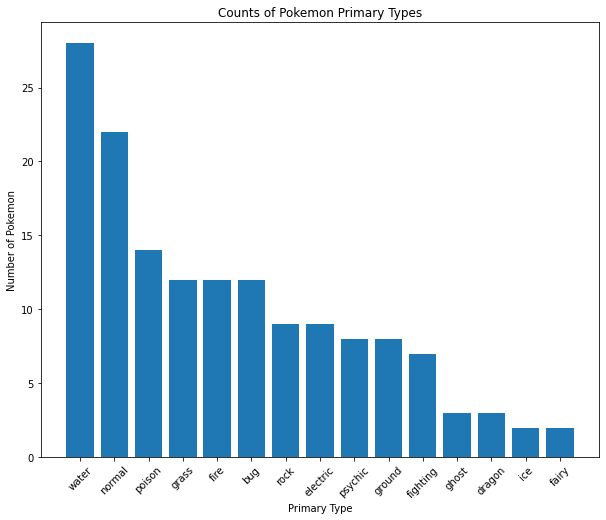

In [56]:
# visualize it!
import matplotlib.pyplot as plt

primary_type_count = poke_df.groupby('primary_type').count()['id'].sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.bar(primary_type_count.index, primary_type_count)

plt.title("Counts of Pokemon Primary Types")
plt.ylabel("Number of Pokemon")
plt.xlabel("Primary Type")
plt.xticks(rotation=45)

plt.show()

![monty python gif - and now for something completely different, from giphy](https://media.giphy.com/media/xznyPebL28X5u/giphy.gif)

# Movie Time!

Let's practice with an API that actually requires some authorization, in the form of an API Key!

https://www.themoviedb.org/settings/api

# **NEVER EVER PUT YOUR API KEY ON GITHUB**

Either create a json file with API keys in a different directory, or create a python file with the key saved as a variable that you can call. (There are even more options than that, but these are two easily-accessible ones)

In [64]:
# Option 1: use a json file saved to some other folder outside your Git repo
# In a new terminal window, create a file called api.json and save the path to that file

# Need to import json to do this
import json

# Define a function to open the json
def get_keys(path):
    with open(path) as f:
        return json.load(f)

# Using the function to open and load all keys in that file 
api_keys = get_keys("/Users/lberlin/secrets/tmdb.json")

# Setting the first (and only) value as a variable
tmdb_1 = api_keys['tmbd_key']


In [69]:
# Option 2: use a python file that's been added to your .gitignore

# In a new terminal window, create a file called keys.py in this repo
# Save the api key as tmdb_api_key = "[key]"

from keys import tmdb_key

tmdb_2 = tmdb_key

# Then let's edit our .gitignore file together

Just as important! You may want to call the variable you've set to check that the API key is rendering correctly - but **be sure to clear the output of that cell** or else the output will show your key! And then if you push to GitHub it'll push that output to the internet which defeats the whole point of saving your key elsewhere!

### And now, accessing movie data

Documentation: https://developers.themoviedb.org/3

In [70]:
# Default URL given as an example... let's see what it is!

example_url = f'https://api.themoviedb.org/3/movie/550?api_key={tmdb_1}'

In [73]:
# Get the response

r = requests.get(example_url).json()

In [74]:
r

{'adult': False,
 'backdrop_path': '/rr7E0NoGKxvbkb89eR1GwfoYjpA.jpg',
 'belongs_to_collection': None,
 'budget': 63000000,
 'genres': [{'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.foxmovies.com/movies/fight-club',
 'id': 550,
 'imdb_id': 'tt0137523',
 'original_language': 'en',
 'original_title': 'Fight Club',
 'overview': 'A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.',
 'popularity': 66.627,
 'poster_path': '/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg',
 'production_companies': [{'id': 508,
   'logo_path': '/7PzJdsLGlR7oW4J0J5Xcd0pHGRg.png',
   'name': 'Regency Enterprises',
   'origin_country': 'US'},
  {'id': 711,
   'logo_path': '/tEiIH5QesdheJmDAqQwvtN60727.png',
   'name': 'Fox 2000 Pictures',
   'origin_country': 'US'},
  {'id': 205

In [75]:
# Check the keys
r.keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [76]:
example_id = r['id']
example_id

550

In [77]:
# Find similar movies to the previous id
base_url = 'https://api.themoviedb.org/3/'

similar_movie_url = f'{base_url}/movie/{example_id}/similar?api_key={tmdb_1}'

In [78]:
# Check out that response

r = requests.get(similar_movie_url).json()

In [84]:
r.keys()

dict_keys(['page', 'results', 'total_pages', 'total_results'])

In [85]:
# How many similar movies did it find?
r['total_results']


10000

In [86]:
# but is that the length of these results?
len(r['results'])


20

In [87]:
# what's in here?

r['results'][0]

{'adult': False,
 'backdrop_path': '/duC9QWccFMy8HNjDWgYeWcKoiw.jpg',
 'genre_ids': [18, 10749, 10752],
 'id': 22971,
 'title': 'Dear John',
 'original_language': 'en',
 'original_title': 'Dear John',
 'overview': "While Sergeant John Tyree is home on two weeks leave from Germany, he meets Savannah after he dives into the ocean to retrieve Savannah's purse that had fallen off a pier. John eventually falls in love with Savannah, who promises to write to him until he returns from overseas.",
 'popularity': 23.897,
 'poster_path': '/2lAPv2jQ5eh54l4EttA9wjDljED.jpg',
 'release_date': '2010-02-04',
 'video': False,
 'vote_average': 6.852,
 'vote_count': 3650}

## Level Up - Another Way to Deal with APIs

Check out [Postman](https://www.getpostman.com/).

## Extra Credit - Further Practice

There are many ways to access data through APIs! [Sodapy](https://github.com/xmunoz/sodapy) is the Python client for the Socrata Open Data API.

In [ ]:
# Install before running 
# !pip install sodapy

#### Tokenize yourself!

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv

Scroll down and click to sign up for an app token! No credit cards required!

In [ ]:
token = '' # paste your token here 

from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", incident_zip = '11004', limit=1000)

In [ ]:
type(results)

In [ ]:
len(results)

In [ ]:
results[0]

In [ ]:
df_soda = pd.DataFrame(results)

print(len(df_soda))
print(df_soda.columns)
df_soda.head()

## Even Further Practice

https://github.com/toddmotto/public-apis

Find a buddy, find a free api, get a key, and do a GET. Try to transform the response into a dataframe.